# Fit Convergent Cross Mapping Model to Data Sets

In this file, it includes two main parts which are fitting CCM based on State wise and Country wise. Also, there are two models respectively:

i) Misogyny tweets against total rape and 
ii) Misogyny tweets against first differences of total rape count

In [2]:
import pandas as pd
import numpy as np
import skccm as ccm
import matplotlib.pyplot as plt
import seaborn as sns
from skccm.utilities import train_test_split
from teaspoon.parameter_selection.FNN_n import FNN_n

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

# FBI Uniform Crime Reporting (UCR) Program Dataset

In [3]:
# from 2012-2020 9 years in total, 12 months for each year
merged_data = pd.read_csv('merged_data.csv',index_col=0)
merged_data = merged_data.sort_values(by=['year','month'],ascending=[True, True])

In [4]:
merged_data.head()

,USstate,year,month,nTweets_x,nTweets_y,Number of establishments (ESTAB),full,population,actual_rape_total,cost_of_living_index
0,ga,2012,1,162945.0,5.0,843.0,Georgia,9986384,186,77.770000
108,nj,2012,1,17721.0,2.0,1656.0,New Jersey,8925939,83,84.134292
324,md,2012,1,25993.0,1.0,1168.0,Maryland,6067471,84,84.071647
432,tx,2012,1,105604.0,6.0,1910.0,Texas,26143479,628,68.166168
540,az,2012,1,62231.0,1.0,208.0,Arizona,6572455,205,74.997196


# Part A: State-wise

In [5]:
state_list = list(set(merged_data['USstate'].to_list()))
print(len(state_list))

41


## 1. Quick View

### i). Total Rape Crime 

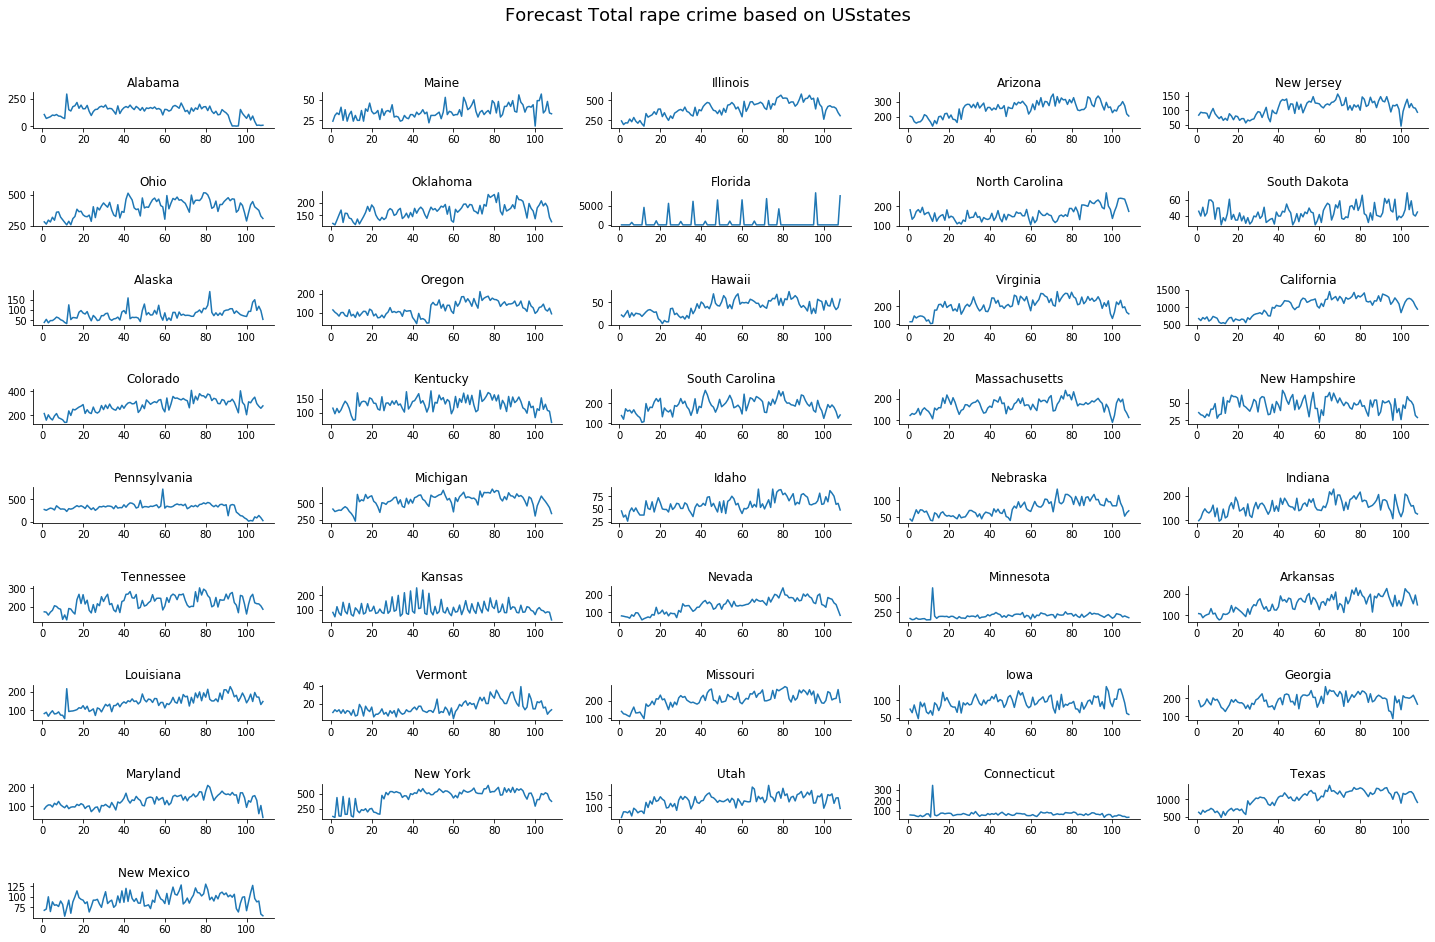

In [6]:
plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast Total rape crime based on USstates", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()

    x1_rape_total = data['actual_rape_total'].to_numpy()

    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(np.arange(1,109),x1_rape_total)
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast Total rape crime based on USstates.png')

### ii). First Differences of Rape Count

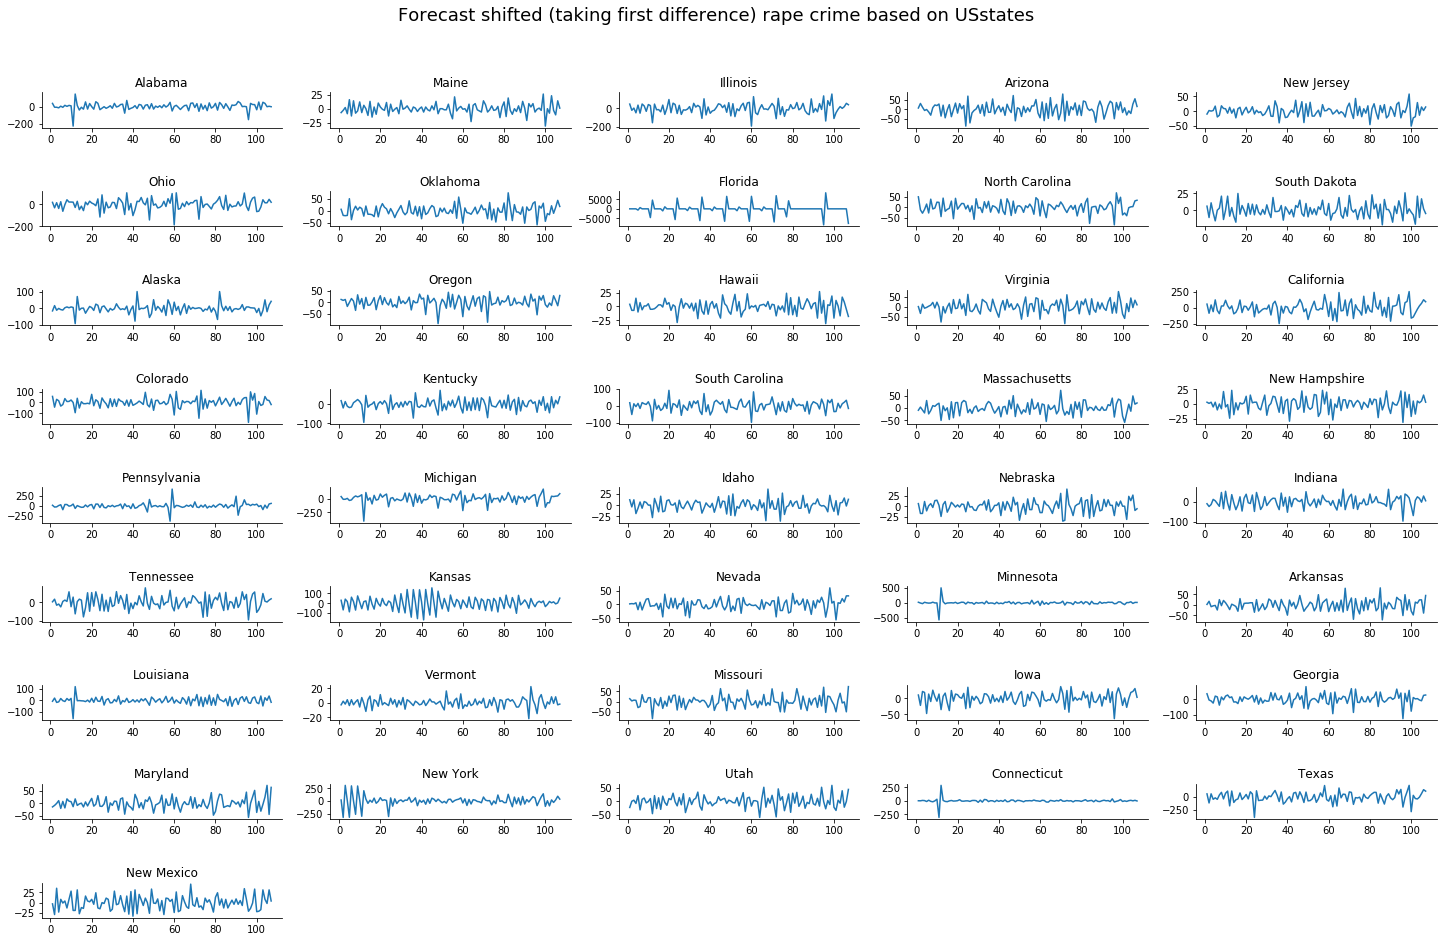

In [7]:
plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast shifted (taking first difference) rape crime based on USstates", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()
    data['shifted_rape_total'] = data['actual_rape_total'] - data['actual_rape_total'].shift(-1)

    x1_shifted_rape_total = data['shifted_rape_total'].to_numpy()

    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(np.arange(1,109),x1_shifted_rape_total)
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast shifted (taking first difference) rape crime based on USstates.png')

In [8]:
data['shifted_rape_total'] = data['shifted_rape_total'].fillna(0)
data

nTweets_x  nTweets_y  Number of establishments (ESTAB)  \
year month                                                              
2012 1       9853.000000        1.0                         95.000000   
     2       9853.000000        1.0                         95.000000   
     3      11804.000000        1.5                         95.000000   
     4      13755.000000        2.0                         95.000000   
     5      15706.000000        2.5                         95.000000   
...                  ...        ...                               ...   
2020 8      28043.000000        1.0                         74.708452   
     9      26944.733333        1.0                         75.047957   
     10     25846.466667        1.0                         75.535672   
     11     24748.200000        1.0                         76.182664   
     12     23649.933333        1.0                         77.000000   

            population  actual_rape_total  cost_of_living_index  \
year month                                                        
2012 1         2089244                 68             68.050695   
     2         2089244                 71             68.479161   
     3         2089244                100             68.913808   
     4         2089244                 65             69.353043   
     5         2089244                 88             69.795275   
...                ...                ...                   ...   
2020 8         2110918                 96             62.477749   
     9         2110918                 88             62.292366   
     10        2110918                 90             62.131582   
     11        2110918                 59             62.000784   
     12        2110918                 55             61.905358   

            shifted_rape_total  
year month                      
2012 1                    -3.0  
     2                   -29.0  
     3                    35.0  
     4                   -23.0  
     5                     8.0  
...                        ...  
2020 8                     8.0  
     9                    -2.0  
     10                   31.0  
     11                    4.0  
     12                    0.0  

[108 rows x 7 columns]

### iii). Misogyny tweets

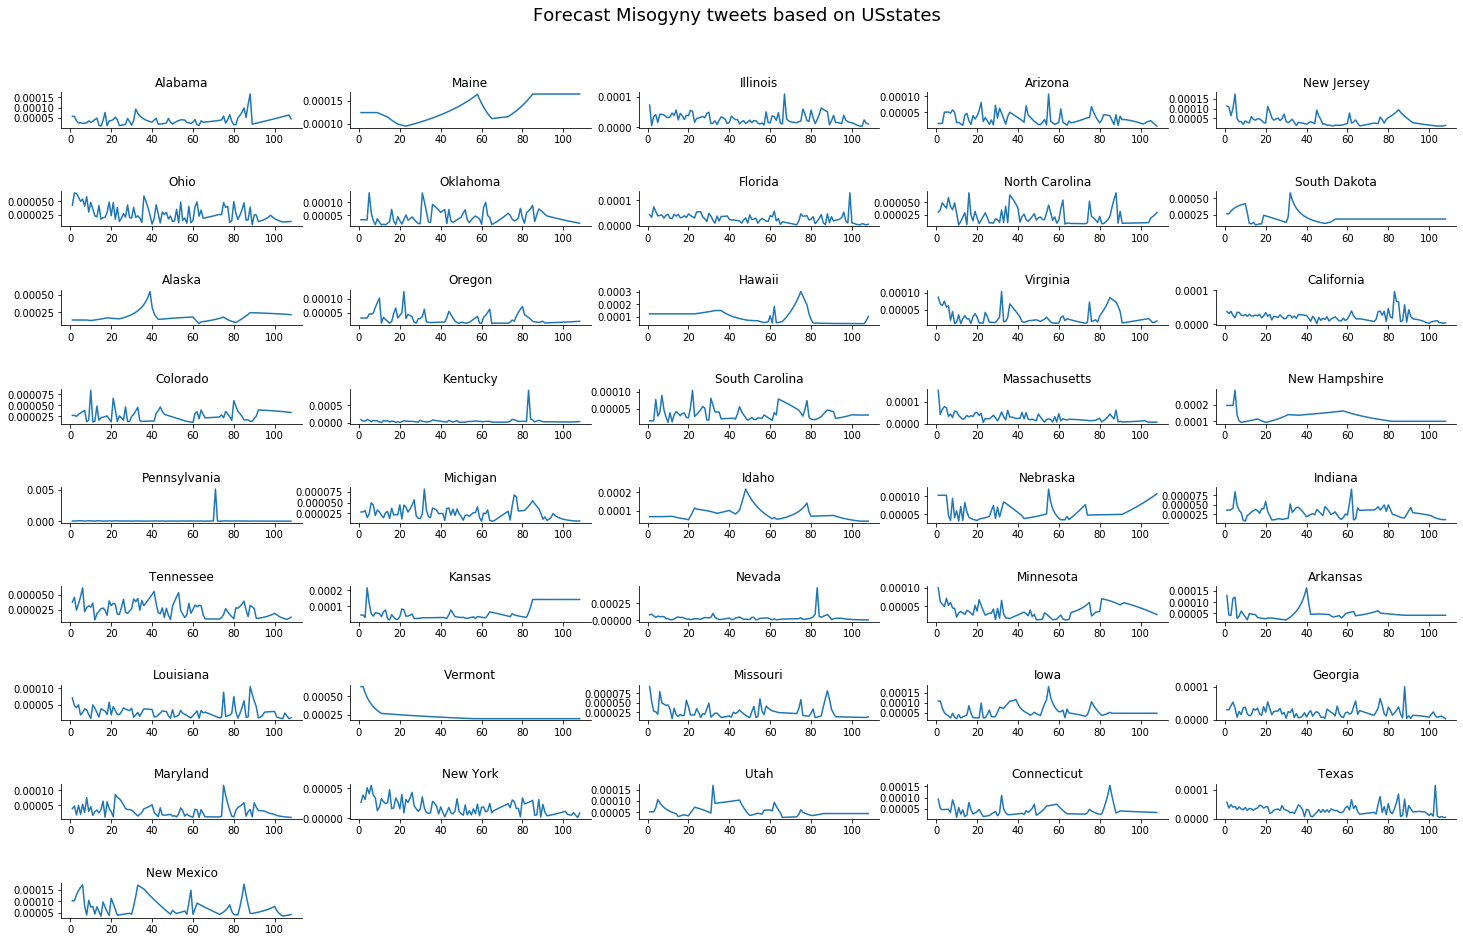

In [9]:
plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast Misogyny tweets based on USstates", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()
    data['misogyny_proportion'] = data['nTweets_y'] / data['nTweets_x']
    
    x2_misogyny_proportion = data['misogyny_proportion'].to_numpy()
    

    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(np.arange(1,109),x2_misogyny_proportion)
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast Misogyny tweets based on USstates.png')

# 2. Fit CCM

### i). Rape Count vs Misogyny Tweets

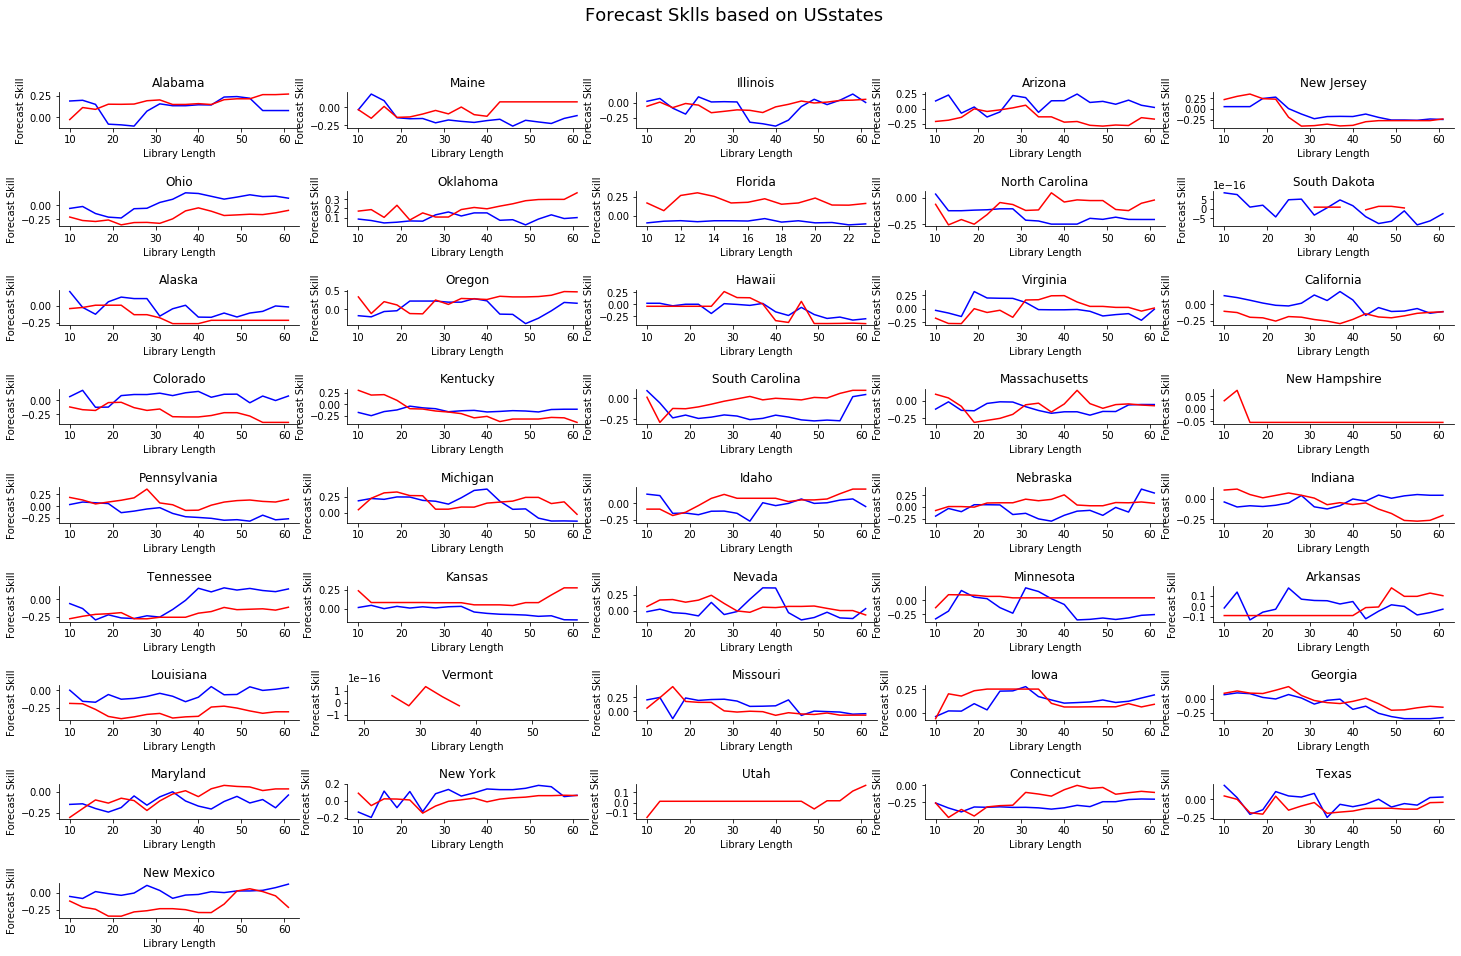

In [10]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast Sklls based on USstates", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()
    data['misogyny_proportion'] = data['nTweets_y'] / data['nTweets_x']
    
    # 0. extract data
    x1_misogyny_proportion = data['misogyny_proportion'].to_numpy()
    x2_rape_total = data['actual_rape_total'].to_numpy()
    
    # 1. Calculate Mutual information
    e1 = ccm.Embed(x1_misogyny_proportion)
    e2 = ccm.Embed(x2_rape_total)

    mi1 = e1.mutual_information(10)
    mi2 = e2.mutual_information(10)
               
    min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
    min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
    min_index1 = max(min_index1, 1)
    min_index2 = max(min_index2, 1)
    lag = max(min_index1, min_index2)
    
    # 2. Embed the time series
    perc_FNN, embed = FNN_n(x2_rape_total, lag, plotting = False)
    X1 = e1.embed_vectors_1d(lag,embed)
    X2 = e2.embed_vectors_1d(lag,embed)
    
    # 3. Forecast skill as a function of library length
    # split the embedded time series
    x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

    CCM = ccm.CCM() # initiate the class

    # library lengths to test
    len_tr = len(x1tr)
    lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
    
    # test causation
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)
    
    sc1,sc2 = CCM.score()
    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
    ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
    ax.set_xlabel('Library Length')
    ax.set_ylabel('Forecast Skill')
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast Sklls based on USstates.png')

### ii). First Differences of Rape Count vs Misogyny Tweets

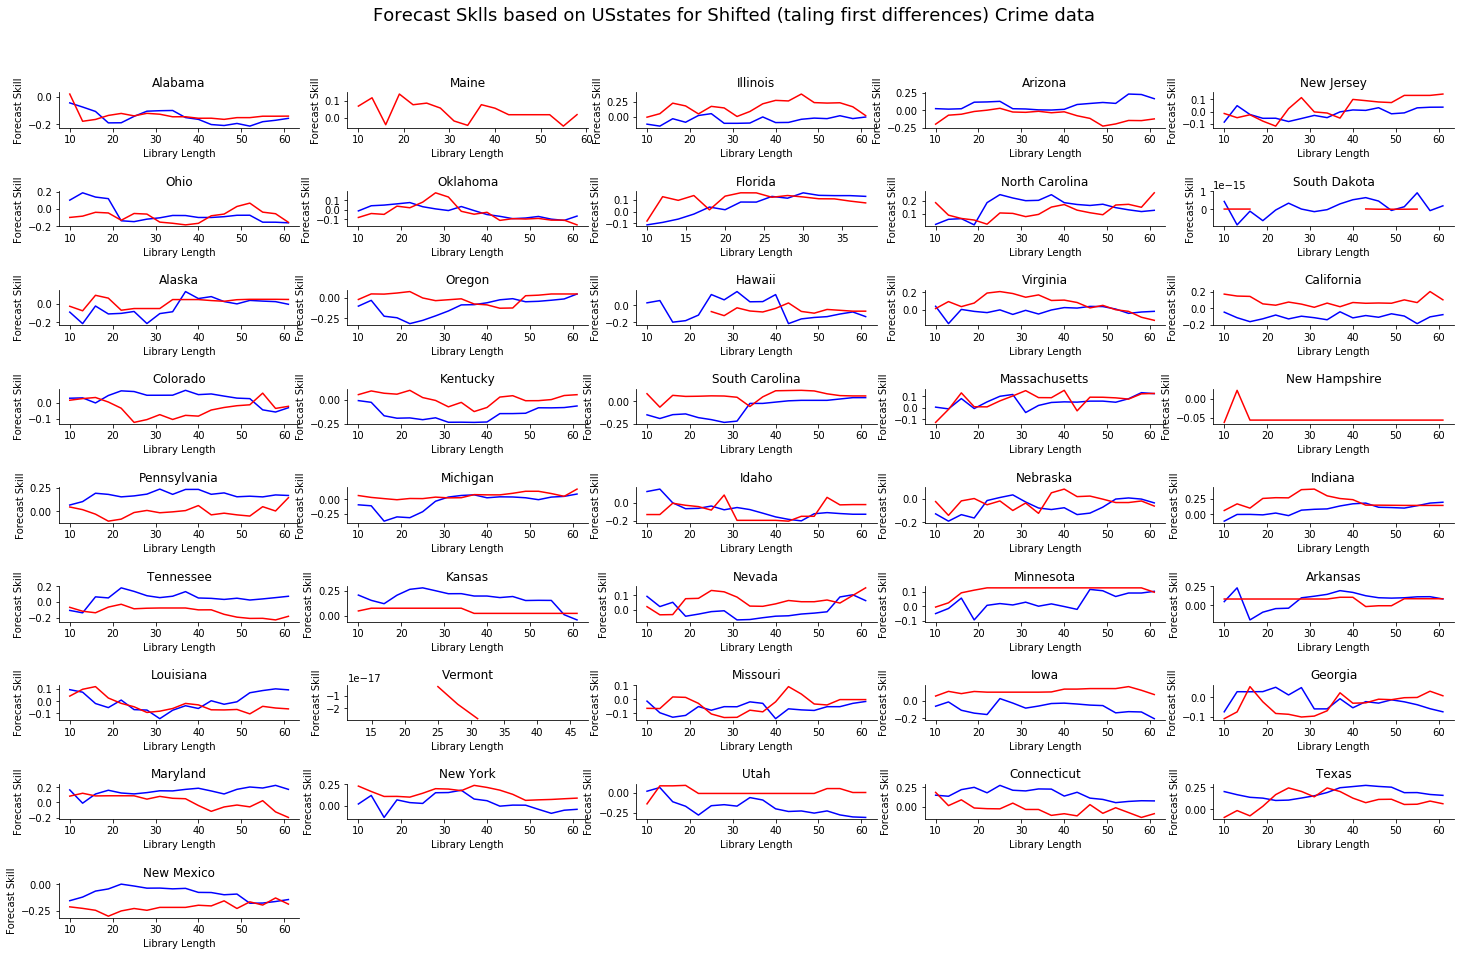

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

plt.figure(figsize=(25, 17))
plt.subplots_adjust(hspace=1.8)
plt.suptitle("Forecast Sklls based on USstates for Shifted (taling first differences) Crime data", fontsize=18, y=0.95)

for i in range(len(state_list)):
    
    data = merged_data[merged_data['USstate']==state_list[i]]
    curr_state = data['full'].iloc[0]
    data = data.groupby(['year','month']).sum()
    data['shifted_rape_total'] = data['actual_rape_total'] - data['actual_rape_total'].shift(-1)
    data['shifted_rape_total'] = data['shifted_rape_total'].fillna(0)
    data['misogyny_proportion'] = data['nTweets_y'] / data['nTweets_x']
    
    # 0. extract data
    x1_misogyny_proportion = data['misogyny_proportion'].to_numpy()
    x2_rape_total = data['shifted_rape_total'].to_numpy()
    
    # 1. Calculate Mutual information
    e1 = ccm.Embed(x1_misogyny_proportion)
    e2 = ccm.Embed(x2_rape_total)

    mi1 = e1.mutual_information(10)
    mi2 = e2.mutual_information(10)
               
    min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
    min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
    min_index1 = max(min_index1, 1)
    min_index2 = max(min_index2, 1)
    lag = max(min_index1, min_index2)
    
    # 2. Embed the time series
    perc_FNN, embed = FNN_n(x2_rape_total, lag, plotting = False)
    X1 = e1.embed_vectors_1d(lag,embed)
    X2 = e2.embed_vectors_1d(lag,embed)
    
    # 3. Forecast skill as a function of library length
    # split the embedded time series
    x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

    CCM = ccm.CCM() # initiate the class

    # library lengths to test
    len_tr = len(x1tr)
    lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
    
    # test causation
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)
    
    sc1,sc2 = CCM.score()
    # plot
    ax = plt.subplot(10, 5, i+1)
    ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
    ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
    ax.set_xlabel('Library Length')
    ax.set_ylabel('Forecast Skill')
    ax.set_title(curr_state)
    sns.despine()
    
plt.savefig('Forecast Sklls based on USstates for Shifted (taling first differences) Crime data.png')

# Part B: Country-wise

# 0. Extract data

In [12]:
merged_data10 = merged_data
merged_data10['misogyny_proportion'] = merged_data10['nTweets_y'] / merged_data10['nTweets_x']
merged_data10 = merged_data10.groupby(['year','month']).sum()
merged_data10['shifted_rape_total'] = merged_data10['actual_rape_total'] - merged_data10['actual_rape_total'].shift(-1)
merged_data10['shifted_rape_total'] = merged_data10['shifted_rape_total'].fillna(0)
merged_data10 = merged_data10.drop(columns=['nTweets_x','nTweets_y','Number of establishments (ESTAB)','population'])
merged_data10

actual_rape_total  cost_of_living_index  misogyny_proportion  \
year month                                                                 
2012 1                   5846           3186.833179             0.003657   
     2                   5349           3206.180004             0.003209   
     3                   6240           3226.909380             0.003085   
     4                   5811           3248.521511             0.003574   
     5                   6080           3270.516604             0.003604   
...                       ...                   ...                  ...   
2020 8                   9331           3018.820727             0.001829   
     9                   8866           3025.160965             0.001852   
     10                  8408           3031.471365             0.001854   
     11                  7519           3037.418122             0.001852   
     12                 14191           3042.667427             0.001884   

            shifted_rape_total  
year month                      
2012 1                   497.0  
     2                  -891.0  
     3                   429.0  
     4                  -269.0  
     5                  -953.0  
...                        ...  
2020 8                   465.0  
     9                   458.0  
     10                  889.0  
     11                -6672.0  
     12                    0.0  

[108 rows x 4 columns]

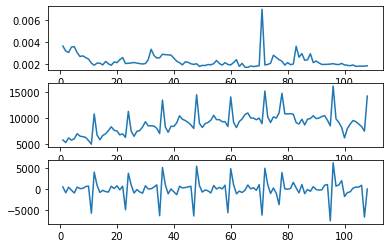

In [13]:
x1_tweet = merged_data10['misogyny_proportion'].to_numpy()
x2_crime = merged_data10['actual_rape_total'].to_numpy()
x3_shifted_crime = merged_data10['shifted_rape_total'].to_numpy()

fig,ax = plt.subplots(nrows=3,sharex=False,sharey=False)
ax[0].plot(np.arange(1,109),x1_tweet)
ax[1].plot(np.arange(1,109),x2_crime)
ax[2].plot(np.arange(1,109),x3_shifted_crime)

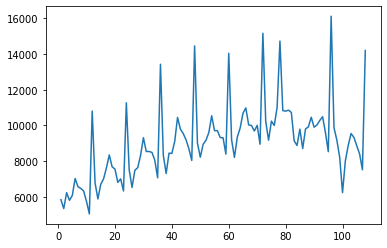

In [14]:
plt.plot(np.arange(1,109),x2_crime)
plt.savefig('actual_rape_total.png')

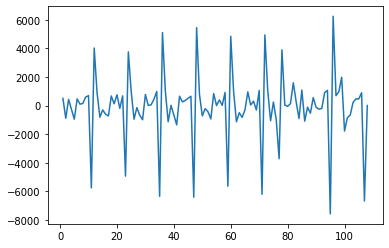

In [15]:
plt.plot(np.arange(1,109),x3_shifted_crime)
plt.savefig('shifted_rape_total.png')

## i). Tweet vs Rape Counts

### 1. Calculate Mutual information

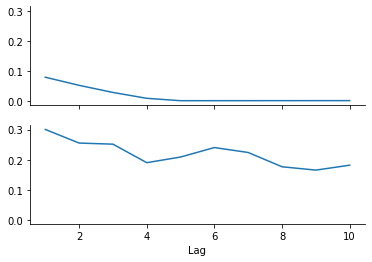

In [16]:
e1 = ccm.Embed(x1_tweet)
e2 = ccm.Embed(x2_crime)

mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)

fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

### 2. Embed the time series 

8


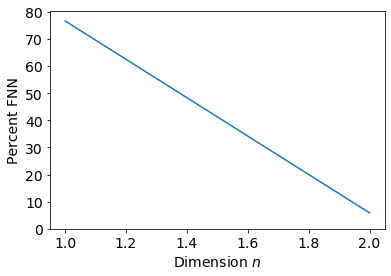

FNN embedding Dimension:  2


In [17]:
min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
min_index1 = max(min_index1, 1)
min_index2 = max(min_index2, 1)
lag = max(min_index1, min_index2)
print(lag)

perc_FNN, embed = FNN_n(x2_crime, lag, plotting = True)
print('FNN embedding Dimension: ',embed)
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

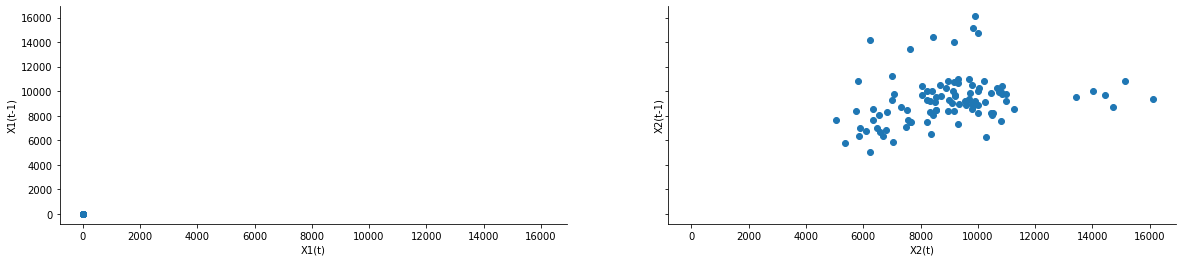

In [18]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(20,4)) 
ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

### 3. Forecast skill as a function of library length

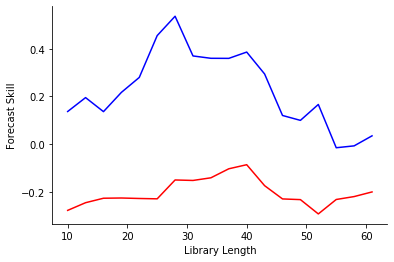

In [19]:
# split the embedded time series
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

CCM = ccm.CCM() # initiate the class

# library lengths to test
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')

# test causation
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

sc1,sc2 = CCM.score()

fig,ax = plt.subplots()
ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
ax.set_xlabel('Library Length')
ax.set_ylabel('Forecast Skill')
sns.despine()

## ii). Misogyny tweet vs First Differences of Rape Counts

### 1. Calculate Mutual information

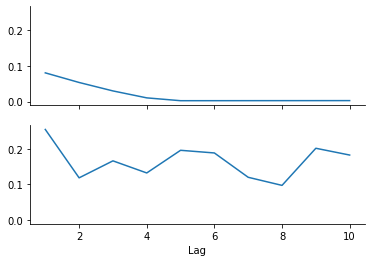

In [20]:
e1 = ccm.Embed(x1_tweet)
e2 = ccm.Embed(x3_shifted_crime)

mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)

fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

### 2. Embed the time series

7


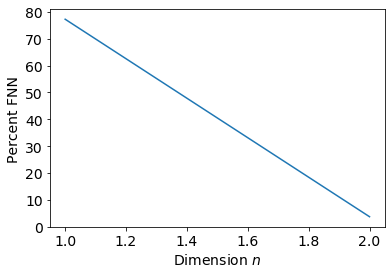

FNN embedding Dimension:  2


In [21]:
min_index1 = min(range(len(mi1)), key=mi1.__getitem__)
min_index2 = min(range(len(mi2)), key=mi2.__getitem__)
min_index1 = max(min_index1, 1)
min_index2 = max(min_index2, 1)
lag = max(min_index1, min_index2)
print(lag)

perc_FNN, embed = FNN_n(x2_crime, lag, plotting = True)
print('FNN embedding Dimension: ',embed)
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

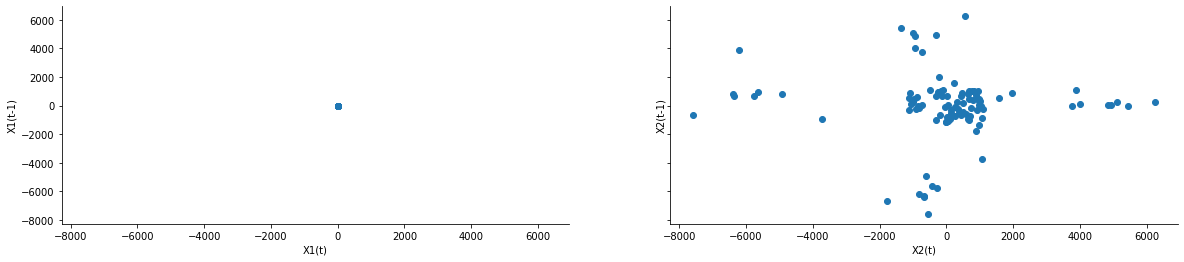

In [22]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(20,4)) 
ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

### 3. Forecast skill as a function of library length

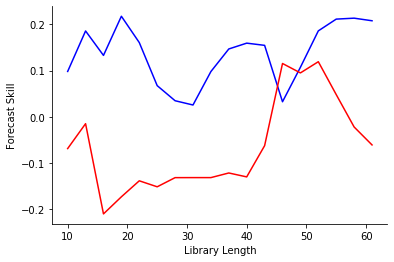

In [23]:
# split the embedded time series
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

CCM = ccm.CCM() # initiate the class

# library lengths to test
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')

# test causation
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

sc1,sc2 = CCM.score()

fig,ax = plt.subplots()
ax.plot(lib_lens,sc1,label='X1 xmap X2', color='blue') # misogyny_tweet predict crime
ax.plot(lib_lens,sc2, label='X2 xmap X1', color='red') # crime predict misogyny_tweet
ax.set_xlabel('Library Length')
ax.set_ylabel('Forecast Skill')
sns.despine()